In [1]:
from tools import *
from random import shuffle
import networkx as nx
import random
from collections import Counter
import numpy as np

In [2]:
theta=0.5 # parameter in clustering algorithm conditions
n_max=10 #maximum amount of clusters
n_min=5 #minimum amount of clusters
d_max=3 #maximum cluster size

N=20 #router number
m=3 #shortest path number
sim_num=1
memsize=10000 #in mb
min_vert_degree=2 #min vertex degree
router_rate_reduction=[0.2,0.5] #router max data rate reduction range in comparisson with the maximum demand from the links
router_delay_coefficient=8 #defines delay time while the package passing through router
link_delay_coefficient=4 #defines delay time while the package passing through link

file_name_full_graph='full_graph_{}_{}.txt'.format(N,sim_num)
file_network='network_{}_{}.txt'.format(N,sim_num)

In [3]:
T=2
p=2
nmax=5
mmin=2

# Reading graph from a file

In [4]:
N, con, edges = ReadGraph(file_name_full_graph)

In [5]:
print('connectivity list', con[1:])

connectivity list [[(12, 7.478260869565217e-05), (13, 5.333333333333333e-05), (17, 9e-05)], [(16, 9.714285714285714e-05), (17, 7.666666666666667e-05)], [(14, 9.333333333333334e-05), (19, 7.372549019607843e-05)], [(5, 7.666666666666667e-05), (9, 0.00014000000000000001), (10, 0.00024)], [(4, 0.00014095238095238096), (13, 7.333333333333334e-05), (16, 9.714285714285714e-05)], [(7, 7.372549019607843e-05)], [(6, 0.00022666666666666668), (9, 0.00012666666666666666), (11, 7.999999999999999e-05), (14, 9.333333333333334e-05)], [(11, 9.333333333333334e-05), (12, 6.144927536231884e-05), (18, 0.00010153846153846153), (19, 8.705882352941177e-05)], [(4, 0.00015428571428571428), (7, 7.372549019607843e-05), (18, 8.820512820512821e-05)], [(4, 0.00015428571428571428)], [(7, 7.372549019607843e-05), (8, 9.333333333333334e-05), (16, 9.714285714285714e-05)], [(1, 8.210526315789474e-05), (8, 7.999999999999999e-05), (14, 7.999999999999999e-05), (20, 8.666666666666667e-05)], [(1, 6.210526315789474e-05), (5, 9e-

In [6]:
print('graph edges',edges)

graph edges [(1, 12, 7.478260869565217e-05), (12, 1, 8.210526315789474e-05), (1, 13, 5.333333333333333e-05), (13, 1, 6.210526315789474e-05), (1, 17, 9e-05), (17, 1, 8.210526315789474e-05), (2, 16, 9.714285714285714e-05), (16, 2, 0.00014000000000000001), (2, 17, 7.666666666666667e-05), (17, 2, 0.00012666666666666666), (3, 14, 9.333333333333334e-05), (14, 3, 0.00014000000000000001), (3, 19, 7.372549019607843e-05), (19, 3, 0.00012666666666666666), (4, 5, 7.666666666666667e-05), (5, 4, 0.00014095238095238096), (4, 9, 0.00014000000000000001), (9, 4, 0.00015428571428571428), (4, 10, 0.00024), (10, 4, 0.00015428571428571428), (5, 13, 7.333333333333334e-05), (13, 5, 9e-05), (5, 16, 9.714285714285714e-05), (16, 5, 9e-05), (6, 7, 7.372549019607843e-05), (7, 6, 0.00022666666666666668), (7, 9, 0.00012666666666666666), (9, 7, 7.372549019607843e-05), (7, 11, 7.999999999999999e-05), (11, 7, 7.372549019607843e-05), (7, 14, 9.333333333333334e-05), (14, 7, 8.705882352941177e-05), (8, 11, 9.3333333333333

# Reading network from a file

In [7]:
router_data_rate, D, con_U, U = ReadNetwork(file_network)

In [8]:
print('Router data rates', router_data_rate)

Router data rates [0, 190000.0, 80000.0, 80000.0, 70000.0, 160000.0, 40000.0, 170000.0, 150000.0, 80000.0, 40000.0, 150000.0, 230000.0, 240000.0, 150000.0, 40000.0, 140000.0, 160000.0, 130000.0, 170000.0, 120000.0]


In [9]:
print('Data stream between nodes per second', D)

Data stream between nodes per second [0, [0, 32.8125, 23.314144736842106, 23.314144736842106, 22.45065789473684, 20.773032760069384, 2.837171052631579, 31.08552631578947, 24.055140814282424, 16.631913324131155, 2.837171052631579, 29.358552631578945, 36.26644736842105, 5.534368487827237, 29.358552631578945, 19.692321012810822, 28.49506578947368, 30.22203947368421, 27.631578947368418, 31.08552631578947, 26.768092105263158], [0, 13.746195813615472, 13.815789473684209, 13.815789473684209, 12.952302631578945, 20.723684210526315, 10.361842105263158, 3.0838815789473686, 9.048749866503695, 13.815789473684209, 6.7536422283780215, 19.86019736842105, 26.768092105263158, 27.631578947368418, 12.295952899764295, 10.361842105263158, 18.996710526315788, 20.723684210526315, 18.133223684210524, 21.58717105263158, 2.467105263157895], [0, 3.3305921052631584, 13.815789473684209, 13.815789473684209, 12.952302631578945, 20.723684210526315, 10.361842105263158, 21.58717105263158, 19.86019736842105, 13.81578947

In [10]:
print('Link capacity connectivity list', con_U[1:])

Link capacity connectivity list [[(12, 100000.0), (13, 200000.0), (17, 100000.0)], [(16, 100000.0), (17, 150000.0)], [(14, 100000.0), (19, 150000.0)], [(5, 150000.0), (9, 100000.0), (10, 100000.0)], [(4, 150000.0), (13, 100000.0), (16, 100000.0)], [(7, 150000.0)], [(6, 150000.0), (9, 150000.0), (11, 150000.0), (14, 100000.0)], [(11, 100000.0), (12, 150000.0), (18, 100000.0), (19, 100000.0)], [(4, 100000.0), (7, 150000.0), (18, 150000.0)], [(4, 100000.0)], [(7, 150000.0), (8, 100000.0), (16, 100000.0)], [(1, 100000.0), (8, 150000.0), (14, 150000.0), (20, 200000.0)], [(1, 200000.0), (5, 100000.0), (19, 200000.0), (20, 100000.0)], [(3, 100000.0), (7, 100000.0), (12, 150000.0), (16, 100000.0), (20, 150000.0)], [(18, 100000.0)], [(2, 100000.0), (5, 100000.0), (11, 100000.0), (14, 100000.0)], [(1, 100000.0), (2, 150000.0), (19, 150000.0)], [(8, 100000.0), (9, 150000.0), (15, 100000.0)], [(3, 150000.0), (8, 100000.0), (13, 200000.0), (17, 150000.0)], [(12, 200000.0), (13, 100000.0), (14, 1500

In [11]:
print('Link capacity edges', U)

Link capacity edges [(1, 12, 100000.0), (12, 1, 100000.0), (1, 13, 200000.0), (13, 1, 200000.0), (1, 17, 100000.0), (17, 1, 100000.0), (2, 16, 100000.0), (16, 2, 100000.0), (2, 17, 150000.0), (17, 2, 150000.0), (3, 14, 100000.0), (14, 3, 100000.0), (3, 19, 150000.0), (19, 3, 150000.0), (4, 5, 150000.0), (5, 4, 150000.0), (4, 9, 100000.0), (9, 4, 100000.0), (4, 10, 100000.0), (10, 4, 100000.0), (5, 13, 100000.0), (13, 5, 100000.0), (5, 16, 100000.0), (16, 5, 100000.0), (6, 7, 150000.0), (7, 6, 150000.0), (7, 9, 150000.0), (9, 7, 150000.0), (7, 11, 150000.0), (11, 7, 150000.0), (7, 14, 100000.0), (14, 7, 100000.0), (8, 11, 100000.0), (11, 8, 100000.0), (8, 12, 150000.0), (12, 8, 150000.0), (8, 18, 100000.0), (18, 8, 100000.0), (8, 19, 100000.0), (19, 8, 100000.0), (9, 18, 150000.0), (18, 9, 150000.0), (11, 16, 100000.0), (16, 11, 100000.0), (12, 14, 150000.0), (14, 12, 150000.0), (12, 20, 200000.0), (20, 12, 200000.0), (13, 19, 200000.0), (19, 13, 200000.0), (13, 20, 100000.0), (20, 13, 

# Step 1. Tree removal

In [12]:
def TreeRemoval(con, N):
    deg=[len(con[i]) for i in range(N+1)]
    con_temp=[set([i for i,_ in con[v]]) for v in range(N+1)]
    con_tree=[[] for _ in range(N+1)]
    
    Queue=[v for v in range(1,N+1) if deg[v]==1] #initialize Queue with leafs
    
    Heads=[]
    
    while Queue:
        
        v=Queue.pop(0)

        if deg[v]>1:
            Heads.append(v)
        else:
            w=con_temp[v].pop() #parent of v
            con_temp[w].remove(v) #edge removal
            con_tree[w].append(v) #edge inclusion

            deg[w]-=1 #degree decreasing 

            Queue.append(w) #adding w to Queue
            
    return set(Heads), con_tree

In [13]:
def dfs(x, head): #Depth-first search 
    
    for v in con_tree[x]:
        trees[head].append(v) #adding vertex to the tree
        dfs(v, head)  

In [14]:
label=[0]*(N+1)
Heads, con_tree=TreeRemoval(con, N)

trees={h:[] for h in Heads}

for i in trees:    
    trees[i].append(i)
    dfs(i,i) # looking for all the tree vertices

In [15]:
print('Tree heads', Heads)

Tree heads {18, 4, 7}


In [16]:
print('Whole trees',trees)

Whole trees {18: [18, 15], 4: [4, 10], 7: [7, 6]}


# New graph without trees

In [17]:
all_trees=set().union(*trees.values()) #all trees combined

In [18]:
print('All trees combined', all_trees)

All trees combined {4, 6, 7, 10, 15, 18}


In [19]:
l=len(all_trees)

In [20]:
print('Size of all trees combined', l)

Size of all trees combined 6


In [21]:
N_new=N-l+len(trees)

In [22]:
N_new

17

In [23]:
conversion_old_2_new=[0]*(N+1)
conversion_new_2_old=[0]*(N_new+1)

In [24]:
cnt=1

for v in trees:
    for w in trees[v]:
        conversion_old_2_new[w]=cnt
        conversion_new_2_old[cnt]=w
        
    cnt+=1
print(conversion_old_2_new)
for i in range(1,N+1):
    if conversion_old_2_new[i]==0:
        conversion_old_2_new[i]=cnt
        conversion_new_2_old[cnt]=i
        cnt+=1
    

[0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]


In [25]:
conversion_old_2_new

[0, 4, 5, 6, 2, 7, 3, 3, 8, 9, 2, 10, 11, 12, 13, 1, 14, 15, 1, 16, 17]

In [26]:
conversion_new_2_old

[0, 15, 10, 6, 1, 2, 3, 5, 8, 9, 11, 12, 13, 14, 16, 17, 19, 20]

In [27]:
con_new=[[] for _ in range(N_new+1)]

In [28]:
for i in range(1,N+1):
    
    for e in con[i]:
        x,y=e
        print(i,x,y,conversion_old_2_new[i],conversion_old_2_new[x],y)
        
        if conversion_old_2_new[i]!=conversion_old_2_new[x]:
            con_new[conversion_old_2_new[i]].append((conversion_old_2_new[x],y))

1 12 7.478260869565217e-05 4 11 7.478260869565217e-05
1 13 5.333333333333333e-05 4 12 5.333333333333333e-05
1 17 9e-05 4 15 9e-05
2 16 9.714285714285714e-05 5 14 9.714285714285714e-05
2 17 7.666666666666667e-05 5 15 7.666666666666667e-05
3 14 9.333333333333334e-05 6 13 9.333333333333334e-05
3 19 7.372549019607843e-05 6 16 7.372549019607843e-05
4 5 7.666666666666667e-05 2 7 7.666666666666667e-05
4 9 0.00014000000000000001 2 9 0.00014000000000000001
4 10 0.00024 2 2 0.00024
5 4 0.00014095238095238096 7 2 0.00014095238095238096
5 13 7.333333333333334e-05 7 12 7.333333333333334e-05
5 16 9.714285714285714e-05 7 14 9.714285714285714e-05
6 7 7.372549019607843e-05 3 3 7.372549019607843e-05
7 6 0.00022666666666666668 3 3 0.00022666666666666668
7 9 0.00012666666666666666 3 9 0.00012666666666666666
7 11 7.999999999999999e-05 3 10 7.999999999999999e-05
7 14 9.333333333333334e-05 3 13 9.333333333333334e-05
8 11 9.333333333333334e-05 8 10 9.333333333333334e-05
8 12 6.144927536231884e-05 8 11 6.14492

In [29]:
con

[[],
 [(12, 7.478260869565217e-05), (13, 5.333333333333333e-05), (17, 9e-05)],
 [(16, 9.714285714285714e-05), (17, 7.666666666666667e-05)],
 [(14, 9.333333333333334e-05), (19, 7.372549019607843e-05)],
 [(5, 7.666666666666667e-05), (9, 0.00014000000000000001), (10, 0.00024)],
 [(4, 0.00014095238095238096),
  (13, 7.333333333333334e-05),
  (16, 9.714285714285714e-05)],
 [(7, 7.372549019607843e-05)],
 [(6, 0.00022666666666666668),
  (9, 0.00012666666666666666),
  (11, 7.999999999999999e-05),
  (14, 9.333333333333334e-05)],
 [(11, 9.333333333333334e-05),
  (12, 6.144927536231884e-05),
  (18, 0.00010153846153846153),
  (19, 8.705882352941177e-05)],
 [(4, 0.00015428571428571428),
  (7, 7.372549019607843e-05),
  (18, 8.820512820512821e-05)],
 [(4, 0.00015428571428571428)],
 [(7, 7.372549019607843e-05),
  (8, 9.333333333333334e-05),
  (16, 9.714285714285714e-05)],
 [(1, 8.210526315789474e-05),
  (8, 7.999999999999999e-05),
  (14, 7.999999999999999e-05),
  (20, 8.666666666666667e-05)],
 [(1, 6.

In [30]:
con_new

[[],
 [(8, 9.333333333333334e-05), (9, 0.00012666666666666666)],
 [(7, 7.666666666666667e-05), (9, 0.00014000000000000001)],
 [(9, 0.00012666666666666666),
  (10, 7.999999999999999e-05),
  (13, 9.333333333333334e-05)],
 [(11, 7.478260869565217e-05), (12, 5.333333333333333e-05), (15, 9e-05)],
 [(14, 9.714285714285714e-05), (15, 7.666666666666667e-05)],
 [(13, 9.333333333333334e-05), (16, 7.372549019607843e-05)],
 [(2, 0.00014095238095238096),
  (12, 7.333333333333334e-05),
  (14, 9.714285714285714e-05)],
 [(10, 9.333333333333334e-05),
  (11, 6.144927536231884e-05),
  (1, 0.00010153846153846153),
  (16, 8.705882352941177e-05)],
 [(2, 0.00015428571428571428),
  (3, 7.372549019607843e-05),
  (1, 8.820512820512821e-05)],
 [(3, 7.372549019607843e-05),
  (8, 9.333333333333334e-05),
  (14, 9.714285714285714e-05)],
 [(4, 8.210526315789474e-05),
  (8, 7.999999999999999e-05),
  (13, 7.999999999999999e-05),
  (17, 8.666666666666667e-05)],
 [(4, 6.210526315789474e-05),
  (7, 9e-05),
  (16, 6.705882

# Drawing new graph

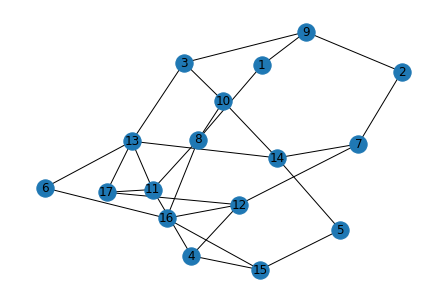

In [31]:
G = nx.Graph()
G.add_nodes_from(range(1,N_new))

for i in range(1,N_new+1):
    for e in con_new[i]:
        x,y=e
        G.add_edge(i,x)

nx.draw(G, with_labels=True)

# Step 2. Depth-first search

In [32]:
vert_seq=[]
label=[0]*(N_new+1)

In [33]:
def dfs_clustering(v):
    vert_seq.append(v)
    
    con_temp_list=[[i] for i in con_new[v]]
    shuffle(con_temp_list)
    
    for e in con_temp_list:
        u,_ = e[0]
        
        if not label[u]:
            label[u]=1
            dfs_clustering(u)
            
            vert_seq.append(v)

In [34]:
dfs_clustering(1) #depth-first search from vertex 1

In [35]:
print('depth-first search tree', vert_seq)

depth-first search tree [1, 8, 16, 15, 4, 11, 13, 6, 13, 14, 7, 12, 17, 12, 7, 2, 9, 3, 10, 3, 9, 1, 9, 2, 7, 14, 5, 14, 13, 11, 4, 15, 16, 8, 1]


In [36]:
print('depth-first search tree length',len(vert_seq))

depth-first search tree length 35


# Step 3. Removing repetitions

In [37]:
def remove_repetitions(vert_seq, N_new):

    vert_seq_copy=vert_seq.copy()
    cnt=Counter(vert_seq_copy)

    removed=0
    l=len(vert_seq_copy)
    pos=random.randint(0,l-1)
    f = random.choice([-1,1])

    while removed<N_new+1:

        if cnt[vert_seq_copy[pos]]>1:
            cnt[vert_seq_copy[pos]]-=1
            vert_seq_copy[pos]=0        
            removed+=1

        pos+=f
        if pos<0:
            pos=l-1

        if pos>l-1:
            pos=0
        
    return vert_seq_copy
        

In [38]:
vert_seq_copy=remove_repetitions(vert_seq, N_new)

In [39]:
print('before', vert_seq)

before [1, 8, 16, 15, 4, 11, 13, 6, 13, 14, 7, 12, 17, 12, 7, 2, 9, 3, 10, 3, 9, 1, 9, 2, 7, 14, 5, 14, 13, 11, 4, 15, 16, 8, 1]


In [40]:
print('after removing repetitions',vert_seq_copy)

after removing repetitions [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 17, 12, 7, 2, 9, 3, 10, 0, 0, 1, 0, 0, 0, 14, 5, 0, 13, 11, 4, 15, 16, 8, 0]


In [41]:
def clean_zeros(arr):

    ans=[]
    l=len(arr)

    fl=True

    for i in range(0,l):

        if arr[i]!=0:
            fl=True
            ans.append(arr[i])
        else:
            if fl:
                ans.append(0)

            fl=False
            
    if ans[0]==ans[-1]:
        ans.pop(0)
            
    return ans
    

In [42]:
vert_after_cleaning_zeros=clean_zeros(vert_seq_copy)

In [43]:
print('after cleaning zeros', vert_after_cleaning_zeros)

after cleaning zeros [6, 0, 17, 12, 7, 2, 9, 3, 10, 0, 1, 0, 14, 5, 0, 13, 11, 4, 15, 16, 8, 0]


In [44]:
con_new

[[],
 [(8, 9.333333333333334e-05), (9, 0.00012666666666666666)],
 [(7, 7.666666666666667e-05), (9, 0.00014000000000000001)],
 [(9, 0.00012666666666666666),
  (10, 7.999999999999999e-05),
  (13, 9.333333333333334e-05)],
 [(11, 7.478260869565217e-05), (12, 5.333333333333333e-05), (15, 9e-05)],
 [(14, 9.714285714285714e-05), (15, 7.666666666666667e-05)],
 [(13, 9.333333333333334e-05), (16, 7.372549019607843e-05)],
 [(2, 0.00014095238095238096),
  (12, 7.333333333333334e-05),
  (14, 9.714285714285714e-05)],
 [(10, 9.333333333333334e-05),
  (11, 6.144927536231884e-05),
  (1, 0.00010153846153846153),
  (16, 8.705882352941177e-05)],
 [(2, 0.00015428571428571428),
  (3, 7.372549019607843e-05),
  (1, 8.820512820512821e-05)],
 [(3, 7.372549019607843e-05),
  (8, 9.333333333333334e-05),
  (14, 9.714285714285714e-05)],
 [(4, 8.210526315789474e-05),
  (8, 7.999999999999999e-05),
  (13, 7.999999999999999e-05),
  (17, 8.666666666666667e-05)],
 [(4, 6.210526315789474e-05),
  (7, 9e-05),
  (16, 6.705882

In [45]:
adj_new=[set([j for j,_ in con_new[i]]) for i in range(len(con_new))]

In [46]:
adj_new

[set(),
 {8, 9},
 {7, 9},
 {9, 10, 13},
 {11, 12, 15},
 {14, 15},
 {13, 16},
 {2, 12, 14},
 {1, 10, 11, 16},
 {1, 2, 3},
 {3, 8, 14},
 {4, 8, 13, 17},
 {4, 7, 16, 17},
 {3, 6, 11, 14, 17},
 {5, 7, 10, 13},
 {4, 5, 16},
 {6, 8, 12, 15},
 {11, 12, 13}]

In [47]:
vert_after_cleaning_zeros

[6, 0, 17, 12, 7, 2, 9, 3, 10, 0, 1, 0, 14, 5, 0, 13, 11, 4, 15, 16, 8, 0]

In [48]:
final_vert=[]
l=len(vert_after_cleaning_zeros)

for i in range(l-1):

    if not vert_after_cleaning_zeros[i] and vert_after_cleaning_zeros[i-1] in adj_new[vert_after_cleaning_zeros[i+1]]:
        continue
        
    final_vert.append(vert_after_cleaning_zeros[i])

In [49]:
print('Before final removal',vert_after_cleaning_zeros)

Before final removal [6, 0, 17, 12, 7, 2, 9, 3, 10, 0, 1, 0, 14, 5, 0, 13, 11, 4, 15, 16, 8, 0]


In [50]:
print('After removing extra zeros between connected consecutive vertices', final_vert)

After removing extra zeros between connected consecutive vertices [6, 0, 17, 12, 7, 2, 9, 3, 10, 0, 1, 0, 14, 5, 0, 13, 11, 4, 15, 16, 8]


# Step 4. Dynamic programming

In [51]:
B_len=len(final_vert)

In [52]:
f = np.array([-np.inf]*n_max*d_max*B_len)

In [53]:
f=f.reshape(n_max,d_max,B_len)

In [54]:
prev= np.zeros((n_max,d_max,B_len))

In [55]:
trees

{18: [18, 15], 4: [4, 10], 7: [7, 6]}

In [56]:
#trees_user_demand_sum={} #sum of tree data rates in new numeration

#for i in trees:
#    trees_user_demand_sum[conversion_old_2_new[i]]=sum([D[j] for j in trees[i]])

In [57]:
conversion_old_2_new

[0, 4, 5, 6, 2, 7, 3, 3, 8, 9, 2, 10, 11, 12, 13, 1, 14, 15, 1, 16, 17]

In [65]:
D_new=np.zeros((N+1,N+1))

In [66]:
for i in range(1,N+1):
    for j in range(1,N+1):
        if i==j:
            continue
        
        i_new=conversion_old_2_new[i]
        j_new=conversion_old_2_new[j]
        
        if i_new!=j_new:
            
            D_new[i_new][j_new]+=D[i][j]

In [67]:
D_new[1][2]

40.213815789473685

In [68]:
D[15][4]+D[18][4]+D[15][10]+D[18][10]

40.213815789473685

In [69]:
conversion_old_2_new

[0, 4, 5, 6, 2, 7, 3, 3, 8, 9, 2, 10, 11, 12, 13, 1, 14, 15, 1, 16, 17]

In [70]:
'''
average_user_demand_new=[0]*(N_new+1) #recalculating average user demand for new numeration

for i in range(1,N+1):
    
    j=conversion_old_2_new[i]
    
    if j in trees_average_user_demand_sum:
        average_user_demand_new[j] = trees_average_user_demand_sum[j]
    else:
        average_user_demand_new[j] = average_user_demand[i]
'''

'\naverage_user_demand_new=[0]*(N_new+1) #recalculating average user demand for new numeration\n\nfor i in range(1,N+1):\n    \n    j=conversion_old_2_new[i]\n    \n    if j in trees_average_user_demand_sum:\n        average_user_demand_new[j] = trees_average_user_demand_sum[j]\n    else:\n        average_user_demand_new[j] = average_user_demand[i]\n'

In [71]:
def on_boundary(x, clust):
    
    for y in adj_new[x]:
        if not y in clust:
            return True
        
    return False

In [72]:
#def cluster_estimation(i,j):
    
    
    

In [ ]:
def g_func():
    g=np.zeros((d_max+1,N_new+1))
    
    for j in range(1,N_new):
        
        #sumD=0
        
        #for i in range(d_max,j+1):
        #    sumD+=D[j+1][i]+D[i][j+1]
            
        #g[d_max][j]=sumD
        
        #for i in range(d_max-1,1,-1):
        #    sumD+=D[j+1][i]+D[i][j+1]
        #    g[i][j]=sumD
            
    return g
            

In [ ]:
g=g_func()

In [ ]:
def h_func():
    h=np.zeros((N_new+1,N_new+1))
    
    
    

In [ ]:
def h_func_old():
    h=np.zeros((N_new+1,N_new+1,N_new+1))
    
    for j in range(1,N_new+1):
        for i in range(d_max+1):
            for k in range(j-d_max-1,j-i):
            
                h[j-i][j][k]=h[j-i+1][j][k]+D[j][k]+D[k][j]
                
    return h

In [ ]:
h=h_func()

In [ ]:
h[1][2][2]

In [ ]:
for k in range(1,n_max+1):
    for i in range(1,d_max+1):

        clust=set()
        out_edges=[]
        
        cluster_estimation=0
        
        for j in range(i+k-1,i+B_len-1):
            bound_router_sum=0  
            
            for l in range(1,max(j-i-k+2,d_max)+1):
                
                if final_vert[j-l+1] == 0:
                    break
                   
                clust.add(final_vert[j-l+1])
                
                if on_boundary(final_vert[j-l+1], clust):
                    bound_router_sum+=final_vert[j-l+1]
                    
                if bound_clust_sum<theta*sum_D:
                    continue
                    
                cluster_estimation+=g[i][j-l][j-l+1]
                
                if f[i][j][k]<cluster_estimation + f[i][j-l][k-1]:
                    f[i][j][k]=cluster_estimation + f[i][j-l][k-1]
                    prev[i][j][k]=j-l
                    